### Merger Rate of Black Holes in a Primordial Black Hole Cluster

###### Code Writed by Tadeo D.
###### Dedicated to the Moon of my life.
**References:** [arXiv:2105.14523](https://arxiv.org/pdf/2105.14523.pdf).

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import math
import seaborn as sns
from scipy import stats
from astropy import constants as const
import csv
from scipy import constants
from scipy.integrate import odeint
from tqdm import tqdm
from scipy import integrate
from scipy.integrate import quad, dblquad
from astropy.cosmology import Planck18 as cosmo# WMAP9 as cosmo #
import astropy.units as u
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sympy import *
from sympy import simplify
import pandas as pd

In [2]:
H0 = cosmo.H(0)  #cosmo.H(0)  <Quantity 67.66 km / (Mpc s)>
G = const.G
c = const.c
z_r = 5000 #3450
z_eq = 3411
z_0 = 0
z_init = 6.900e9
rho_c0 = (3*(H0**2))/(8*math.pi*G)
rho_eq = cosmo.critical_density(3411)
rho_crit = cosmo.critical_density(0)
Omega_DM = cosmo.Odm(0)
Omega_M = cosmo.Om(0)
Omega_R = 8.4e-5
Omega_lmb = 1-Omega_M - Omega_R
result_i=0
result_j=0

$$\rho_{i}(r) = \rho_{0,i}\left(\frac{r}{r_{0}}\right)^{-1} \left(1 + \frac{r^{2}}{r^{2}_{0}}\right)^{-2}$$

In [3]:
M = 10**6 * u.M_sun#M is the total mass of the cluster
R = 0.9*u.parsec #Scale factor that determines the core radius
v_rel = (G*M/R)**(1./2.)#The characteristic velocity of the PBHs
m_i = 10.*u.M_sun
m_j = 30.*u.M_sun
#error=1

if m_i==m_j:
    N_i = M/(2*m_i)
    N_j = M/(2*m_j) 
if m_j>m_i:
    zetha = (m_j/m_i)
    N_i = (M/(zetha*m_i))
    N_j =  N_i - (M/(zetha*m_j))
if m_i>m_j:
    zetha = (m_i/m_j)
    N_j = (M/(zetha*m_j))
    N_i = N_j - (M/(zetha*m_i))

M_i_t = (N_i*m_i)
M_j_t = (N_j*m_j)
    
print("Cluster Propierities\n")
print("M =\t", M)
print("R =\t", R)
print("m_i =\t", m_i, "\t\t N_i =\t", N_i)
print("m_j =\t", m_j, "\t\t N_j =\t", N_j)
#print("M_t = ", (M_i_t + M_j_t))
print("\t\t\t\t N_total =\t",N_i + N_j)
print("v_rel =\t", v_rel.to(u.parsec* u.s**(-1)))

Cluster Propierities

M =	 1000000.0 solMass
R =	 0.9 pc
m_i =	 10.0 solMass 		 N_i =	 33333.333333333336
m_j =	 30.0 solMass 		 N_j =	 22222.222222222226
				 N_total =	 55555.55555555556
v_rel =	 2.2403132345214995e-12 pc / s


In [4]:
interval = 0.1
r = np.arange(.1, R.value+interval, interval)
N_i_1_array = []
N_j_1_array = []
#N_total_casc = []
def V(radius):
    return (4/3)*math.pi*(radius**3.)

print("Numbers of PBHs into Cluster by spherical regions")
print("Primordial Black holes Masses:\t", "m_i = ",m_i,"\t m_j = ", m_j, "\n")
print("radius \t\t n_pbh_mi(r) \t\t n_pbh_mj(r) \t\t total n_pbh(r)")

if m_i==m_j:
    for i in r:
        i=i*u.parsec
        Ni_casc = round(float(N_i*(V(i)/V(R))))
        Nj_casc = round(float(N_j*(V(i)/V(R))))
        N_i = N_i - Ni_casc
        N_j = N_j - Nj_casc
        N_i_1_array.append(Ni_casc)
        N_j_1_array.append(Nj_casc)
        result_i = result_i + Ni_casc
        result_j = result_j + Nj_casc
        print("%.2f" %i.value," \t\t ",Ni_casc," \t\t ",Nj_casc, " \t\t ", Ni_casc + Nj_casc)
        #N_total_casc.append(Ni_casc + Nj_casc)
    print("\n Total numbers of PBHs into Cluster = ",result_i + result_j)
    N_i = M/(2*m_i)
    N_j = M/(2*m_j) 

    
if m_j>m_i:
    for i in r:
        i=i*u.parsec
        Ni_casc = round(float(N_i*(V(i)/V(R))))
        Nj_casc = round(float(N_j*(V(i)/V(R))))
        N_i = N_i - Ni_casc
        N_j = N_j - Nj_casc
        N_i_1_array.append(Ni_casc)
        N_j_1_array.append(Nj_casc)
        result_i = result_i + Ni_casc
        result_j = result_j + Nj_casc
        print("%.2f" %i.value," \t\t ",Ni_casc," \t\t ",Nj_casc, " \t\t ", Ni_casc + Nj_casc)
        #N_total_casc.append(Ni_casc + Nj_casc)
    print("\n Total numbers of PBHs into Cluster = ",result_i + result_j)
    zetha = (m_j/m_i)
    N_i = (M/(zetha*m_i))
    N_j =  N_i - (M/(zetha*m_j))
    
if m_i>m_j:
    for i in r:
        i=i*u.parsec
        Ni_casc = round(float(N_i*(V(i)/V(R))))
        Nj_casc = round(float(N_j*(V(i)/V(R))))
        N_i = N_i - Ni_casc
        N_j = N_j - Nj_casc
        N_i_1_array.append(Ni_casc)
        N_j_1_array.append(Nj_casc)
        result_i = result_i + Ni_casc
        result_j = result_j + Nj_casc
        print("%.2f" %i.value," \t\t ",Ni_casc," \t\t ",Nj_casc, " \t\t ", Ni_casc + Nj_casc)
        #N_total_casc.append(Ni_casc + Nj_casc)
    print("\n Total numbers of PBHs into Cluster = ",result_i + result_j)
    zetha = (m_i/m_j)
    N_j = (M/(zetha*m_j))
    N_i = N_j - (M/(zetha*m_i))
    
result_i=0
result_j=0

#print(N_i_1_array)

Numbers of PBHs into Cluster by spherical regions
Primordial Black holes Masses:	 m_i =  10.0 solMass 	 m_j =  30.0 solMass 

radius 		 n_pbh_mi(r) 		 n_pbh_mj(r) 		 total n_pbh(r)
0.10  		  46  		  30  		  76
0.20  		  365  		  244  		  609
0.30  		  1219  		  813  		  2032
0.40  		  2783  		  1855  		  4638
0.50  		  4959  		  3306  		  8265
0.60  		  7100  		  4733  		  11833
0.70  		  7933  		  5289  		  13222
0.80  		  6271  		  4180  		  10451
0.90  		  2657  		  1772  		  4429

 Total numbers of PBHs into Cluster =  55555


In [5]:
#Masas en cada cascaron (se podría decir que la masa es función del radio)
M_i_1_value = []
M_j_1_value = []
print("Primordial Black holes Masses:\t", "m_i = ",m_i,"\t m_j = ", m_j, "\n")
print("radius \t\t  Mass_mi(r) \t\t Mass_mj(r)")
for h, i, j in zip(r, N_i_1_array, N_j_1_array):
    M_i_1 = i*m_i
    M_i_1_value.append(M_i_1)
    M_j_1 = j*m_j
    M_j_1_value.append(M_j_1)
    print("{0:.2f}".format(h), " \t\t ","{0:.2f}".format(M_i_1)," \t","{0:.2f}".format(M_j_1))

Primordial Black holes Masses:	 m_i =  10.0 solMass 	 m_j =  30.0 solMass 

radius 		  Mass_mi(r) 		 Mass_mj(r)
0.10  		  460.00 solMass  	 900.00 solMass
0.20  		  3650.00 solMass  	 7320.00 solMass
0.30  		  12190.00 solMass  	 24390.00 solMass
0.40  		  27830.00 solMass  	 55650.00 solMass
0.50  		  49590.00 solMass  	 99180.00 solMass
0.60  		  71000.00 solMass  	 141990.00 solMass
0.70  		  79330.00 solMass  	 158670.00 solMass
0.80  		  62710.00 solMass  	 125400.00 solMass
0.90  		  26570.00 solMass  	 53160.00 solMass


In [6]:
Energy_it = G*((m_i*N_i)**(2.))/((2*R)*(1*u.M_sun))#According to the virial theorem, the total energy
print("E_i =\t", Energy_it.to(u.parsec**2.*u.s**(-2.)))

Energy_jt = G*((m_j*N_j)**(2.))/((2*R)*(1*u.M_sun))#According to the virial theorem, the total energy
print("E_j =\t", Energy_jt.to(u.parsec**2.*u.s**(-2.)))

E_i =	 2.788335215984547e-19 pc2 / s2
E_j =	 1.1153340863938187e-18 pc2 / s2


In [7]:
#Ei_array = []
#Ej_array = []
#for i, j in zip(N_i_1_array, N_j_1_array):
    #Energy_i1 = G*((m_i*i)**(2.))/((2*R)*(1*u.M_sun))#According to the virial theorem, the total energy
   # Ei_array.append(Energy_i1.to(u.parsec**2.*u.s**(-2.)))
    #print("Ei =\t", Energy_i1.to(u.parsec**2.*u.s**(-2.)))
  #  Energy_j1 = G*((m_j*j)**(2.))/((2*R)*(1*u.M_sun))#According to the virial theorem, the total energy
 #   Ej_array.append(Energy_j1.to(u.parsec**2.*u.s**(-2.)))
    #print("Ej =\t", Energy_j1.to(u.parsec**2.*u.s**(-2.)))
#print(Ei_array,"\n",Ej_array)

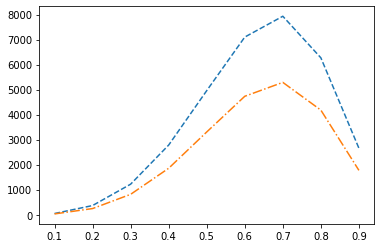

In [8]:
pl.plot(r, N_i_1_array,"--")
pl.plot(r, N_j_1_array, "-.")
#pl.plot(r, N_total_casc, "blue")

In [9]:
sigma = 2*math.pi*(85*math.pi/(6*math.sqrt(2)))**(2./7.) * (G**(2.) * (m_i+m_j)**(10./7.) * m_i**(2./7.) * m_j**(2./7.))/(c**(10./7.))
sigma = sigma.to(u.m**(32./7)/u.s**(18./7.))#.to(u.parsec**2)
print(sigma)
#print(sigma)
#sigma.to(u.AU**2)
#sigma.to(u.parsec**2.)

2.283691800897856e+32 m(32/7) / s(18/7)


In [10]:
def f_i(E_i): ## eq. 19 shapiro
    return (24. * (2.)**(1./2.) * N_i * R**2. * E_i**(7./2.))/(7*(math.pi**(3.))*(G**5.)*(M**5.))

def f_j(E_j):
    return (24. * (2.)**(1./2.) * N_j * R**2. * E_j**(7./2.))/(7*(math.pi**(3.))*(G**5.)*(M**5.))

def rho_i(r):## eq. 20
    return ((3*M_i_t)/(4*(math.pi)*(R**(3.))))*((1 + r**(2.)/R**(2.))**(-5./2.))

def rho_j(r):
    return ((3*M_j_t)/(4*(math.pi)*(R**(3.))))*((1 + r**(2.)/R**(2.))**(-5./2.))

def phi(r):## eq. 21
    return (G*M/R)*((1 + r**(2.)/R**(2.))**(-1./2.))

def integrant(E):
    return E**(7./2.)*((2*(a - E))**(3./2.))

In [11]:
print("f_i(E_i) \t\t\t\t f_j(E_j)")
print(f_i(Energy_it).to(u.s**3. / (u.m**6.)),"\t\t",f_j(Energy_jt).to(u.s**3. / (u.m**6.)))
#PH_i(1.*u.parsec)
#rho_i(1*u.parsec)

f_i(E_i) 				 f_j(E_j)
2.9774640455122414e-44 s3 / m6 		 2.5407693188371135e-42 s3 / m6


In [12]:
def n_i_1(r):
    return (rho_i(r)/m_i)

def n_j_1(r):
    return (rho_j(r)/m_j)

print("n_i_1 \t\t\t\t\t n_j_1")
for h in r:
    h=h*u.parsec
    print(n_i_1(h),"\t\t",n_j_1(h))#,"\t",n_i_1(h, M))

n_i_1 					 n_j_1
10586.21046317268 1 / pc3 		 7057.47364211512 1 / pc3
9676.712554294772 1 / pc3 		 6451.141702863182 1 / pc3
8388.202017414505 1 / pc3 		 5592.134678276338 1 / pc3
6955.77970643195 1 / pc3 		 4637.1864709546335 1 / pc3
5571.992095987925 1 / pc3 		 3714.661397325283 1 / pc3
4353.218844343665 1 / pc3 		 2902.14589622911 1 / pc3
3345.159068413952 1 / pc3 		 2230.1060456093014 1 / pc3
2545.9809470464957 1 / pc3 		 1697.3206313643304 1 / pc3
1929.6903209814523 1 / pc3 		 1286.4602139876347 1 / pc3


In [13]:
alfa = ((4*24*(2**(1/2))*(R**(2.)))/(math.pi*(G**(5.))*(M**(5.))*(2**(17./2.))))

def vel_i(r):
    return (alfa**(1./2.))*(N_i**(1./2.))*((phi(r)**(3))/(n_i_1(r)**(1./2.)))

def vel_j(r):
    return (alfa**(1./2.))*(N_j**(1./2.))*((phi(r)**(3))/(n_j_1(r)**(1./2.)))

print("vel_i \t\t\t\t vel_j")
for h in r:
    h = h*u.parsec
    print(vel_i(h).to(u.km/u.s), "\t", vel_j(h).to(u.km/u.s))

vel_i 				 vel_j
48.73175851802236 km / s 	 48.73175851802236 km / s
48.29596133294002 km / s 	 48.29596133294002 km / s
47.610738636831556 km / s 	 47.610738636831556 km / s
46.72750719163334 km / s 	 46.727507191633336 km / s
45.70240770219025 km / s 	 45.70240770219024 km / s
44.58811177168943 km / s 	 44.58811177168942 km / s
43.428987911655355 km / s 	 43.428987911655355 km / s
42.25942134609748 km / s 	 42.259421346097476 km / s
41.10425611218507 km / s 	 41.10425611218507 km / s


In [14]:
betha = (3./(4*math.pi*(R**(3.))))
etha = (G*M/R)

In [15]:
def GAMMA(r1,r0): #Equation (11)
    a=(r1**(2.)/((R.value)**(2.)))
    b=(r0**(2.)/(R**(2.)))
    return (r1**(2.))*((1.+(a))**(-9./4.))*(1./((1. + a)**(1./4.)) + 1./((1. + b)**(1./4.)))**(3./7.) - abs((1./((1. + a)**(1./4.)) - 1./((1. + b)**(1./4.))))**(3./7.)

In [16]:
def r_star(N_ij, Mi):
    kappa = (1-((8*24*(2**(1./2.))*N_ij*m_i)/(3*Mi*2**(17./2.))))*(1*u.M_sun)
    r_star_quad = (4.*(kappa**(2.))*(Mi*R)**(2.))/((m_i*N_ij)**(4.)) - R**(2.)
    r_star_value = (abs(r_star_quad))**(1./2.)
    return r_star_value

#for i,j in zip(N_i_1_array, M_i_1_value):
#    print(r_star(i,j))
#r_star(N_i, M_i_t)

In [17]:
print("Primordial Black holes Masses:\t", "m_i = ",m_i,"\t m_j = ", m_j, "\n")
print("radius \t merger_rate \t\t\t Number_Mergers at Universe's time \t time to the first Merger\n")

colm1 = []
colm2 = []
colm3 = []
colm4 = []

for h in r:
    r0 = h*u.parsec
    colm1.append("%.2f"%r0.value)
    I, err = quad(GAMMA, h+interval, 0., args=(r0,))
    nash_rubi = (14*math.pi/3.)*sigma*(N_i)*(n_j_1(r0)/vel_j(r0))*(alfa**(-2./7.))*(betha**(9./7.))*(etha**(-12./7.))
    #I = I*units
    merger = (I*nash_rubi*(u.parsec**(3.))).to(u.yr**(-1))
    colm2.append(merger.value)
    colm3.append((merger*(cosmo.age(0).to(u.yr))).value)
    colm4.append(((merger**(-1.)).to(u.Gyr)).value)
    print("%.2f"%r0.value,"\t",merger,"\t\t", merger*(cosmo.age(0).to(u.yr)),"\t\t",(merger**(-1.)).to(u.Gyr))#/(cosmo.age(0).to(u.yr)))


Primordial Black holes Masses:	 m_i =  10.0 solMass 	 m_j =  30.0 solMass 

radius 	 merger_rate 			 Number_Mergers at Universe's time 	 time to the first Merger

0.10 	 1.4410667407719385e-10 1 / yr 		 1.9867821867563673 		 6.939303862250879 Gyr
0.20 	 2.7023533652541767e-10 1 / yr 		 3.7257035892259283 		 3.700478304790249 Gyr
0.30 	 3.8982347577487144e-10 1 / yr 		 5.374451548538913 		 2.565263669696266 Gyr
0.40 	 4.78231930836734e-10 1 / yr 		 6.5933287782046905 		 2.0910356158158647 Gyr
0.50 	 5.29097525705802e-10 1 / yr 		 7.294606900483025 		 1.890010728487204 Gyr
0.60 	 5.467609807007434e-10 1 / yr 		 7.538130928535493 		 1.8289527513802712 Gyr
0.70 	 5.393703223751483e-10 1 / yr 		 7.43623676989417 		 1.854013761076884 Gyr
0.80 	 5.150996232602229e-10 1 / yr 		 7.1016194249971045 		 1.941372027552058 Gyr
0.90 	 4.807046993185653e-10 1 / yr 		 6.627420553642124 		 2.0802792263474323 Gyr


In [18]:
for i in colm4:
    if i<cosmo.age(0).value:
        delta_t_1 = (np.amin(colm4))*u.Gyr
        delta_t_1 = round((delta_t_1/10.).to(u.yr).value)
    else:
        print("To get mergers we need age of universe")
            
print("Minimum time to get 1st Generation: \n T_merger = ","{:.1e}".format(delta_t_1)*u.yr)

Minimum time to get 1st Generation: 
 T_merger =  1.8e+08 yr


In [19]:
number_col_array = []
prob_array = []
print("Primordial Black holes Masses:\t", "m_i = ",m_i,"\t m_j = ", m_j,N_i,N_j,  "\n")
print("Merger_Rate \t\t\t | Probability \t\t | Collision Number \t |")
print("----------------------------------------------------------------------------------")

def integrand_n_i(r1):
    a=(r1**(2.)/((R.value)**(2.)))
    return (R.value**(2.))*((1 + a)**(-5./2.))

def integrand_n_i_b(r1):
    a=(r1**(2.)/((R.value)**(2.)))
    return (r1**(2.))*((1 + a)**(-5./2.))

#for h in r:
#    I, err = quad(integrand_n_i, 0 , h+interval)
#    resultado = betha*N_i*I
#    print(resultado*u.parsec**3.)
    
#for h in r:
#    I, err = quad(integrand_n_i_b, 0 , h+interval)
#    resultado = 3*N_i*(R**(-3.))*I
#    print(resultado*u.parsec**3.)

for h,i in zip(colm2, r):
    GAMMA_value = h*(1/u.yr)
    Prob = GAMMA_value*(delta_t_1*u.yr) #integration dt
    prob_array.append(Prob)
    #I, err = quad(integrand_n_i, 0 , i+interval)
    #N_j_r = betha*N_j*I*u.parsec**3.
    I, err = quad(integrand_n_i_b, 0 , i+interval)
    N_j_r = 3*N_j*(R**(-3.))*I*u.parsec**3.
    Num_Col = N_j_r*Prob #numero de choques
    #Num_Col = N_j*Prob
    number_col_array.append(Num_Col)
    print(GAMMA_value, " \t | " , Prob, " \t\t |" , Num_Col, " \t | ")

Primordial Black holes Masses:	 m_i =  10.0 solMass 	 m_j =  30.0 solMass 33333.333333333336 22222.222222222226 

Merger_Rate 			 | Probability 		 | Collision Number 	 |
----------------------------------------------------------------------------------
1.4410667407719385e-10 1 / yr  	 |  0.026356429784683742  		 | 5.979097913366496  	 | 
2.7023533652541767e-10 1 / yr  	 |  0.04942476618853381  		 | 34.732185328232454  	 | 
3.8982347577487144e-10 1 / yr  	 |  0.07129687180330095  		 | 106.14030569934282  	 | 
4.78231930836734e-10 1 / yr  	 |  0.08746636050416544  		 | 222.62798582164493  	 | 
5.29097525705802e-10 1 / yr  	 |  0.09676943746578222  		 | 367.0292372709364  	 | 
5.467609807007434e-10 1 / yr  	 |  0.09999999992453215  		 | 514.2408553765478  	 | 
5.393703223751483e-10 1 / yr  	 |  0.0986482834376414  		 | 642.828282886017  	 | 
5.150996232602229e-10 1 / yr  	 |  0.09420928724857486  		 | 740.1780651579849  	 | 
4.807046993185653e-10 1 / yr  	 |  0.08791861817566131  		 | 802

## SECOND GENERATION

In [20]:
Ni_2_values = []
Nj_2_values = []
N_k_values = []
m_k = m_i + m_j
N_k_tot = 0.
print("PBHs with mass:  m_i = ", m_i," \t m_j = ", m_j, "\t m_k = ", m_k,"\n")# \t  Number_pbhs at cluster")
for h in number_col_array:
    number_binaries = round(float(h))#Nuevos Agujeros Negros
    N_k_tot = N_k_tot + number_binaries
print("N_k = \t ",N_k_tot, "PBHs with ", m_k,"\n\n")
N_i_2 = N_i - N_k_tot
N_j_2 = N_j - N_k_tot
print("Total Numbers PBHs for species 2nd Generation with", m_i)
print("N_i_2 \t\t\t N_j_2")
print(N_i_2,"\t\t",N_j_2)
M_i_2 = (N_i_2*m_i)
M_j_2 = (N_j_2*m_j)
M_k = N_k_tot*m_k
#print(M_i_2, M_j_2, M_k)
#print(M- (M_i_2 + M_j_2 + M_k))

PBHs with mass:  m_i =  10.0 solMass  	 m_j =  30.0 solMass 	 m_k =  40.0 solMass 

N_k = 	  3436.0 PBHs with  40.0 solMass 


Total Numbers PBHs for species 2nd Generation with 10.0 solMass
N_i_2 			 N_j_2
29897.333333333336 		 18786.222222222226


In [21]:
#Ei_2_array = []
#Ej_2_array = []
#Ek_array=[]
#for i,j,k in zip (Ni_2_values, Nj_2_values, N_k_values):
#    Energy_mi2 = G*(m_i*i)**(2.)/((2*R)*(1*u.M_sun)) #According to the virial theorem, the total energy
#    Energy_mj2 = G*((m_j)*j)**(2.)/((2*R)*(1*u.M_sun)) #According to the virial theorem, the total energy
#    Energy_mk = G*((m_k)*k)**(2.)/((2*R)*(1*u.M_sun)) #According to the virial theorem, the total energy
#   Ei_2_array.append(Energy_mi2.to(u.parsec**2.*u.s**(-2.)))
#   Ej_2_array.append(Energy_mj2.to(u.parsec**2.*u.s**(-2.)))
#Ek_array.append(Energy_mk.to(u.parsec**2.*u.s**(-2.)))
print("M =\t", M)
print("R =\t", R)
print("v_rel =\t", v_rel.to(u.parsec* u.s**(-1)))
print("m_i_2 =\t", m_i)
print("m_j_2 =\t", m_j)
print("m_k = \t", m_k)
#print("E =\t", Energy.to(u.parsec**2.*u.s**(-2.)))
#print("Energy to m_i = \t", Energy_mi.to(u.parsec**2.*u.s**(-2.)))
#print("Energy to m_j_2 = \t", Energy_mj2.to(u.parsec**2.*u.s**(-2.)))
print("\n")
#print(Ei_2_array,"\n",Ej_2_array,"\n",Ek_array)

M =	 1000000.0 solMass
R =	 0.9 pc
v_rel =	 2.2403132345214995e-12 pc / s
m_i_2 =	 10.0 solMass
m_j_2 =	 30.0 solMass
m_k = 	 40.0 solMass




In [22]:
#print("M_i \t\t\t M_j \t\t\t M_k")# \t\t\t  vel_rel_i \t\t\t  vel_rel_j")
#Mi_array = []
#Mj_array = []
#Mk_array = []
#for i,j,k in zip(Ni_2_values, Nj_2_values, N_k_values):
#    Mi = i*u.M_sun
#    Mj = j*u.M_sun
#    Mk = k*u.M_sun
#    Mi_array.append(Mi)
#    Mj_array.append(Mj)
#    Mk_
#    print(Mi,"\t\t",Mj,"\t ")#, v_ri.to(u.km/u.s)," \t ",v_rj.to(u.km/u.s))

In [23]:
print(m_i, m_j, m_k, "\n")

sigma_2_ij = 2*math.pi*(85*math.pi/(6*math.sqrt(2)))**(2./7.) * (G**(2.) * (m_i+m_j)**(10./7.) * m_i**(2./7.) * m_j**(2./7.))/(c**(10./7.))
sigma_2_ij = sigma_2_ij.to(u.parsec**(32./7)/u.yr**(18./7.))#.to(u.parsec**2)
#print(m_i, m_j_2)
print(sigma_2_ij)

sigma_2_ik = 2*math.pi*(85*math.pi/(6*math.sqrt(2)))**(2./7.) * (G**(2.) * (m_i+m_k)**(10./7.) * m_i**(2./7.) * m_k**(2./7.))/(c**(10./7.))
sigma_2_ik = sigma_2_ik.to(u.parsec**(32./7)/u.yr**(18./7.))#.to(u.parsec**2)
#print(m_i, m_j_2)
print(sigma_2_ik)

sigma_2_jk = 2*math.pi*(85*math.pi/(6*math.sqrt(2)))**(2./7.) * (G**(2.) * (m_i+m_k)**(10./7.) * m_i**(2./7.) * m_k**(2./7.))/(c**(10./7.))
sigma_2_jk = sigma_2_jk.to(u.parsec**(32./7)/u.yr**(18./7.))#.to(u.parsec**2)
#print(m_i, m_j_2)
print(sigma_2_jk)



10.0 solMass 30.0 solMass 40.0 solMass 

1.82877167704502e-24 pc(32/7) / yr(18/7)
2.730858166433343e-24 pc(32/7) / yr(18/7)
2.730858166433343e-24 pc(32/7) / yr(18/7)


In [24]:
def f_i2(E): ## eq. 19 shapiro
    return (24. * (2.)**(1./2.) * Ni_2 * R**2. * E**(7./2.))/(7*(math.pi**(3.))*(G**5.)*(M**5.))

def f_j2(E):
    return (24. * (2.)**(1./2.) * Nj_2 * R**2. * E**(7./2.))/(7*(math.pi**(3.))*(G**5.)*(M**5.))

def f_k(E):
    return (24. * (2.)**(1./2.) * N_k_tot * R**2. * E**(7./2.))/(7*(math.pi**(3.))*(G**5.)*(M**5.))

def rho_i2(r):## eq. 20
    return ((3*M_i_2)/(4*(math.pi)*(R**(3.))))*((1 + r**(2.)/R**(2.))**(-5./2.))

def rho_j2(r):
    return ((3*M_j_2)/(4*(math.pi)*(R**(3.))))*((1 + r**(2.)/R**(2.))**(-5./2.))

def rho_k(r):
    return ((3*M_k)/(4*(math.pi)*(R**(3.))))*((1 + r**(2.)/R**(2.))**(-5./2.))

def phi(r):## eq. 21
    return (G*M/R)*((1 + r**(2.)/R**(2.))**(-1./2.))

#def integrant(E):
#    return E**(7./2.)*((2*(a - E))**(3./2.))

In [25]:
#print("N_i \t\t f_i2 \t\t\t\t\t\t N_j \t\t f_j2")
#for h,i,j,k,l in zip (r, Ni_2_values, Nj_2_values, Ei_2_array, Ej_2_array):
#    h = h*u.parsec
#    print(i,"\t",f_i2(k, i).to(u.s**3./(u.m**6.))," \t\t ",j,"\t",f_j2(l, j).to(u.s**3./(u.m**6.)))
#print("\n")
#print("M_i \t\t\t rho_i2 \t\t\t\t M_j \t\t\t  rho_j2")
#for h,k,l in zip (r, Mi_array, Mj_array):
#    h = h*u.parsec
#    print(k,"\t",rho_i2(h,k),"\t",l,"\t",rho_j2(h,l))

In [26]:
def n_i_2(r):
    return (rho_i2(r)/m_i)

def n_j_2(r):
    return (rho_j2(r)/m_j)

def n_k(r):
    return (rho_k(r)/m_k)
    

In [27]:
alfa_2 = ((4*24*(2**(1/2))*(R**(2.)))/(math.pi*(G**(5.))*(M**(5.))*(2**(17./2.))))

def vel_i2(r):
    return (alfa_2**(1./2.))*(N_i_2**(1./2.))*((phi(r)**(3))/(n_i_2(r)**(1./2.)))

def vel_j2(r):
    return (alfa_2**(1./2.))*(N_j_2**(1./2.))*((phi(r)**(3))/(n_j_2(r)**(1./2.)))

def vel_k(r):
    return (alfa_2**(1./2.))*(N_k_tot**(1./2.))*((phi(r)**(3))/(n_k(r)**(1./2.)))


#for h,i,j,k,l in zip(r, Ni_2_values, Nj_2_values, Mi_array, Mj_array):
#    h = h*u.parsec
#    print(vel_i2(h,i,k).to(u.km/u.s), "\t",vel_j2(h,j,l).to(u.km/u.s))

#print("\n")
#for h in r:
    #h = h*u.parsec
    #print("r = ","%.2f"%h.value)
    #print("vel_rel = ")
    #for i,j,k,l in zip(Ni_2_values, Nj_2_values, Mi_array, Mj_array):
    #    print(vel_i2(h,i,k).to(u.km/u.s), "\t", vel_j2(h,j,l).to(u.km/u.s))

In [28]:
#CONSTANTS SECOND GENERATION
betha_2 = (3./(4*math.pi*(R**(3.))))
etha_2 = (G*M/R)
#zetha2 = alfa**(-1./2.) * betha**(3./2.) * etha**(-3.) * alfa**(3./14.) * etha**(9./7.) * betha**(-3./14.)
#print(zetha)

In [29]:
def GAMMA_2(r1,r0): #Equation (11)
    a=(r1**(2.)/((R.value)**(2.)))
    b=(r0**(2.)/(R**(2.)))
    return (r1**(2.))*((1.+(a))**(-9./4.))*(1./((1. + a)**(1./4.)) + 1./((1. + b)**(1./4.)))**(3./7.) - abs((1./((1. + a)**(1./4.)) - 1./((1. + b)**(1./4.))))**(3./7.)



colm1_2gnd_ij = []
colm2_2gnd_ij = []
colm3_2gnd_ij = []
colm4_2gnd_ij = []
print("Black holes Masses:\t", m_i, m_j, "\n")
print("radius \t merger_rate \t\t\t Number_Mergers at Universe's time \t time to the first Merger\n")

for h in r :
    r0 = h*u.parsec
    colm1_2gnd_ij.append("%.2f"%r0.value)
    I, err = quad(GAMMA_2, h+interval, 0., args=(r0,))
    nash_rubi = (14*math.pi/3.)*sigma_2_ij*(N_i_2)*(n_j_2(r0)/vel_j2(r0))*(alfa_2**(-2./7.))*(betha_2**(9./7.))*(etha_2**(-12./7.))
    #I = I*units
    merger2 = (I*nash_rubi*(u.parsec**(3.))).to(u.yr**(-1))
    colm2_2gnd_ij.append(merger2.value)
    colm3_2gnd_ij.append((merger2*(cosmo.age(0).to(u.yr))).value)
    colm4_2gnd_ij.append(((merger2**(-1.)).to(u.Gyr)).value)
    #print("%.2f"%r0.value,"\t",merger*u.parsec**(3))
    print("%.2f"%r0.value,"\t",merger2,"\t\t", merger2*(cosmo.age(0).to(u.yr)),"\t\t",(merger2**(-1.)).to(u.Gyr))#/(cosmo.age(0).to(u.yr)))

Black holes Masses:	 10.0 solMass 30.0 solMass 

radius 	 merger_rate 			 Number_Mergers at Universe's time 	 time to the first Merger

0.10 	 1.0926718942583749e-10 1 / yr 		 1.5064542078869896 		 9.151878118716748 Gyr
0.20 	 2.0490276314239628e-10 1 / yr 		 2.82497089350908 		 4.880363664520495 Gyr
0.30 	 2.95579062128062e-10 1 / yr 		 4.075114627235193 		 3.3831895696547747 Gyr
0.40 	 3.626137325758407e-10 1 / yr 		 4.999313939956737 		 2.7577554575676473 Gyr
0.50 	 4.011819711769146e-10 1 / yr 		 5.531049821850286 		 2.492634444829069 Gyr
0.60 	 4.1457507802089856e-10 1 / yr 		 5.715699049745854 		 2.4121083321597796 Gyr
0.70 	 4.0897119833652035e-10 1 / yr 		 5.63843900329107 		 2.4451599625290825 Gyr
0.80 	 3.9056822640846476e-10 1 / yr 		 5.384719340102863 		 2.5603721254943514 Gyr
0.90 	 3.644886801717154e-10 1 / yr 		 5.02516362740834 		 2.743569428627761 Gyr


In [30]:
def GAMMA_2(r1,r0): #Equation (11)
    a=(r1**(2.)/((R.value)**(2.)))
    b=(r0**(2.)/(R**(2.)))
    return (r1**(2.))*((1.+(a))**(-9./4.))*(1./((1. + a)**(1./4.)) + 1./((1. + b)**(1./4.)))**(3./7.) - abs((1./((1. + a)**(1./4.)) - 1./((1. + b)**(1./4.))))**(3./7.)



colm1_2gnd_ik = []
colm2_2gnd_ik = []
colm3_2gnd_ik = []
colm4_2gnd_ik = []
print("m_i and m_k")
print("Black holes Masses:\t", m_i, m_k, "\n")
print("radius \t merger_rate \t\t\t Number_Mergers at Universe's time \t time to the first Merger\n")

for h in r :
    r0 = h*u.parsec
    colm1_2gnd_ik.append("%.2f"%r0.value)
    I, err = quad(GAMMA_2, h+interval, 0., args=(r0,))
    nash_rubi = (14*math.pi/3.)*sigma_2_ik*(N_i_2)*(n_k(r0)/vel_k(r0))*(alfa_2**(-2./7.))*(betha_2**(9./7.))*(etha_2**(-12./7.))
    #I = I*units
    merger2 = (I*nash_rubi*(u.parsec**(3.))).to(u.yr**(-1))
    colm2_2gnd_ik.append(merger2.value)
    colm3_2gnd_ik.append((merger2*(cosmo.age(0).to(u.yr))).value)
    colm4_2gnd_ik.append(((merger2**(-1.)).to(u.Gyr)).value)
    #print("%.2f"%r0.value,"\t",merger*u.parsec**(3))
    print("%.2f"%r0.value,"\t",merger2,"\t\t", merger2*(cosmo.age(0).to(u.yr)),"\t\t",(merger2**(-1.)).to(u.Gyr))#/(cosmo.age(0).to(u.yr)))

m_i and m_k
Black holes Masses:	 10.0 solMass 40.0 solMass 

radius 	 merger_rate 			 Number_Mergers at Universe's time 	 time to the first Merger

0.10 	 2.9843044722952356e-11 1 / yr 		 0.4114426346580902 		 33.50864529016698 Gyr
0.20 	 5.596302381755142e-11 1 / yr 		 0.7715557905262189 		 17.868941522176552 Gyr
0.30 	 8.072852625392273e-11 1 / yr 		 1.112994932063112 		 12.387195040011132 Gyr
0.40 	 9.90370292791537e-11 1 / yr 		 1.3654121633234693 		 10.097233401269742 Gyr
0.50 	 1.0957078305744181e-10 1 / yr 		 1.5106398184643388 		 9.126520520308377 Gyr
0.60 	 1.1322870716644963e-10 1 / yr 		 1.5610711985986858 		 8.831682574366672 Gyr
0.70 	 1.1169817606263236e-10 1 / yr 		 1.5399699418191988 		 8.952697664814789 Gyr
0.80 	 1.0667195806279119e-10 1 / yr 		 1.4706740507524918 		 9.37453495895671 Gyr
0.90 	 9.954911479403603e-11 1 / yr 		 1.3724722275819725 		 10.045292738855274 Gyr


In [31]:
def GAMMA_2(r1,r0): #Equation (11)
    a=(r1**(2.)/((R.value)**(2.)))
    b=(r0**(2.)/(R**(2.)))
    return (r1**(2.))*((1.+(a))**(-9./4.))*(1./((1. + a)**(1./4.)) + 1./((1. + b)**(1./4.)))**(3./7.) - abs((1./((1. + a)**(1./4.)) - 1./((1. + b)**(1./4.))))**(3./7.)



colm1_2gnd_jk = []
colm2_2gnd_jk = []
colm3_2gnd_jk = []
colm4_2gnd_jk = []
print("m_j and m_k")
print("Black holes Masses:\t", m_j, m_k, "\n")
print("radius \t merger_rate \t\t\t Number_Mergers at Universe's time \t time to the first Merger\n")

for h in r :
    r0 = h*u.parsec
    colm1_2gnd_jk.append("%.2f"%r0.value)
    I, err = quad(GAMMA_2, h+interval, 0., args=(r0,))
    nash_rubi = (14*math.pi/3.)*sigma_2_jk*(N_j_2)*(n_k(r0)/vel_k(r0))*(alfa_2**(-2./7.))*(betha_2**(9./7.))*(etha_2**(-12./7.))
    #I = I*units
    merger2 = (I*nash_rubi*(u.parsec**(3.))).to(u.yr**(-1))
    colm2_2gnd_jk.append(merger2.value)
    colm3_2gnd_jk.append((merger2*(cosmo.age(0).to(u.yr))).value)
    colm4_2gnd_jk.append(((merger2**(-1.)).to(u.Gyr)).value)
    #print("%.2f"%r0.value,"\t",merger*u.parsec**(3))
    print("%.2f"%r0.value,"\t",merger2,"\t\t", merger2*(cosmo.age(0).to(u.yr)),"\t\t",(merger2**(-1.)).to(u.Gyr))#/(cosmo.age(0).to(u.yr)))

m_j and m_k
Black holes Masses:	 30.0 solMass 40.0 solMass 

radius 	 merger_rate 			 Number_Mergers at Universe's time 	 time to the first Merger

0.10 	 1.8752109551122705e-11 1 / yr 		 0.2585331835520495 		 53.32733350739886 Gyr
0.20 	 3.516480182170215e-11 1 / yr 		 0.48481308938370954 		 28.437526964330697 Gyr
0.30 	 5.0726398136244916e-11 1 / yr 		 0.6993590328884877 		 19.713601531772905 Gyr
0.40 	 6.223068858761909e-11 1 / yr 		 0.8579673658225889 		 16.06924208450671 Gyr
0.50 	 6.884965480466496e-11 1 / yr 		 0.9492222938748774 		 14.524401071249008 Gyr
0.60 	 7.114813990424504e-11 1 / yr 		 0.9809112443111663 		 14.055181222528846 Gyr
0.70 	 7.018641876631742e-11 1 / yr 		 0.96765210529004 		 14.247770688079354 Gyr
0.80 	 6.70281555449928e-11 1 / yr 		 0.9241094925040817 		 14.91910364934252 Gyr
0.90 	 6.255246150870549e-11 1 / yr 		 0.8624036121788997 		 15.986581117368644 Gyr


In [32]:
number_col_array_ij = []
number_col_array_ik = []
number_col_array_jk = []
prob_array_ij = []
prob_array_ik = []
prob_array_jk = []

delta_t_2 = (cosmo.age(0).to(u.yr)-(delta_t_1*u.yr))/10.
print("{:.1e}".format(delta_t_2))
print("Primordial Black holes Masses:\t", "m_i = ",m_i,"\t m_j = ", m_j,"\t m_j = ",m_k, "\n")
print("Merger_species \t| radius      | Merger_Rate \t\t | Probability \t | Collision Number")
print("----------------------------------------------------------------------------------")

def integrand_n_i(r1):
    a=(r1**(2.)/((R.value)**(2.)))
    return (r1**(2.))*((1 + a)**(-5./2.))

for h,i,j,k in zip(r, colm2_2gnd_ij, colm2_2gnd_ik, colm2_2gnd_jk):
    GAMMA_value_ij = i*(1/u.yr)
    GAMMA_value_ik = j*(1/u.yr)
    GAMMA_value_jk = k*(1/u.yr)
    Prob_ij = GAMMA_value_ij*delta_t_2 #integration dt
    Prob_ik = GAMMA_value_ik*delta_t_2 #integration dt
    Prob_jk = GAMMA_value_jk*delta_t_2 #integration dt
    prob_array_ij.append(Prob_ij)
    prob_array_ik.append(Prob_ik)
    prob_array_jk.append(Prob_jk)
    #I, err = quad(integrand_n_i, 0 , i+interval)
    #N_j_r = betha*N_j*I*u.parsec**3.
    Int_res, err = quad(integrand_n_i, 0 , h+interval)
    N_i2_r = 3*N_i_2*(R**(-3.))*Int_res*u.parsec**3.
    N_j2_r = 3*N_j_2*(R**(-3.))*Int_res*u.parsec**3.
    N_k_r = 3*N_k_tot*(R**(-3.))*Int_res*u.parsec**3.
    Num_Col_ij = N_i2_r*Prob_ij #numero de choques especie i-j
    Num_Col_ik = N_i2_r*Prob_ik #numero de choques especie i-k
    Num_Col_jk = N_j2_r*Prob_jk #numero de choques especie j-k
    number_col_array_ij.append(Num_Col_ij)
    number_col_array_ik.append(Num_Col_ik)
    number_col_array_jk.append(Num_Col_jk)
    print("m_i - m_j","\t|\t","{0:.2f}".format(h),"|\t","{:e}".format(GAMMA_value_ij), " \t | " , "{0:.4f}".format(Prob_ij), " \t |" , Num_Col_ij, " \t | ")
    print("m_i - m_k","\t|\t","{0:.2f}".format(h), "|\t","{:e}".format(GAMMA_value_ik), " \t | " , "{0:.4f}".format(Prob_ik), " \t |" , Num_Col_ik, " \t | ")
    print("m_j - m_k","\t|\t","{0:.2f}".format(h), "|\t","{:e}".format(GAMMA_value_jk), " \t | " , "{0:.4f}".format(Prob_jk), " \t |" , Num_Col_jk, " \t | ")
    print("\n")




1.4e+09 yr
Primordial Black holes Masses:	 m_i =  10.0 solMass 	 m_j =  30.0 solMass 	 m_j =  40.0 solMass 

Merger_species 	| radius      | Merger_Rate 		 | Probability 	 | Collision Number
----------------------------------------------------------------------------------
m_i - m_j 	|	 0.10 |	 1.092672e-10 1 / yr  	 |  0.1486  	 | 45.36805169301961  	 | 
m_i - m_k 	|	 0.10 |	 2.984304e-11 1 / yr  	 |  0.0406  	 | 12.390918104349524  	 | 
m_j - m_k 	|	 0.10 |	 1.875211e-11 1 / yr  	 |  0.0255  	 | 4.892349674559904  	 | 


m_i - m_j 	|	 0.20 |	 2.049028e-10 1 / yr  	 |  0.2787  	 | 263.5400192828722  	 | 
m_i - m_k 	|	 0.20 |	 5.596302e-11 1 / yr  	 |  0.0761  	 | 71.97802581976865  	 | 
m_j - m_k 	|	 0.20 |	 3.516480e-11 1 / yr  	 |  0.0478  	 | 28.419336503499203  	 | 


m_i - m_j 	|	 0.30 |	 2.955791e-10 1 / yr  	 |  0.4021  	 | 805.3687939974579  	 | 
m_i - m_k 	|	 0.30 |	 8.072853e-11 1 / yr  	 |  0.1098  	 | 219.96225091933292  	 | 
m_j - m_k 	|	 0.30 |	 5.072640e-11 1 / yr  	 | 